<a href="https://colab.research.google.com/github/KrisDA-1/NU_Pandas/blob/main/BD_Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis 1: Building Size vs. Energy Cost

###Ho: There is **no** relationship between building size and energy cost.

###H1: There is a relationship between building size and energy cost

Target: energy_cost_brl,
Dependent: energy_cost_brl,
Independent: building_size_m2

#Hypothesis 2: Occupants vs. Energy Cost

###Ho: Mean energy cost is the same despite amount of occupants.

###H1: Mean energy cost differs according to amount of occupants.

Target: energy_cost_brl,
Dependent: energy_cost_brl,
Independent: occupants

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std

from scipy import stats

In [6]:
df = pd.read_csv('energy_consumption.csv')
df.head()

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06


In [7]:
df.shape

(5000, 6)

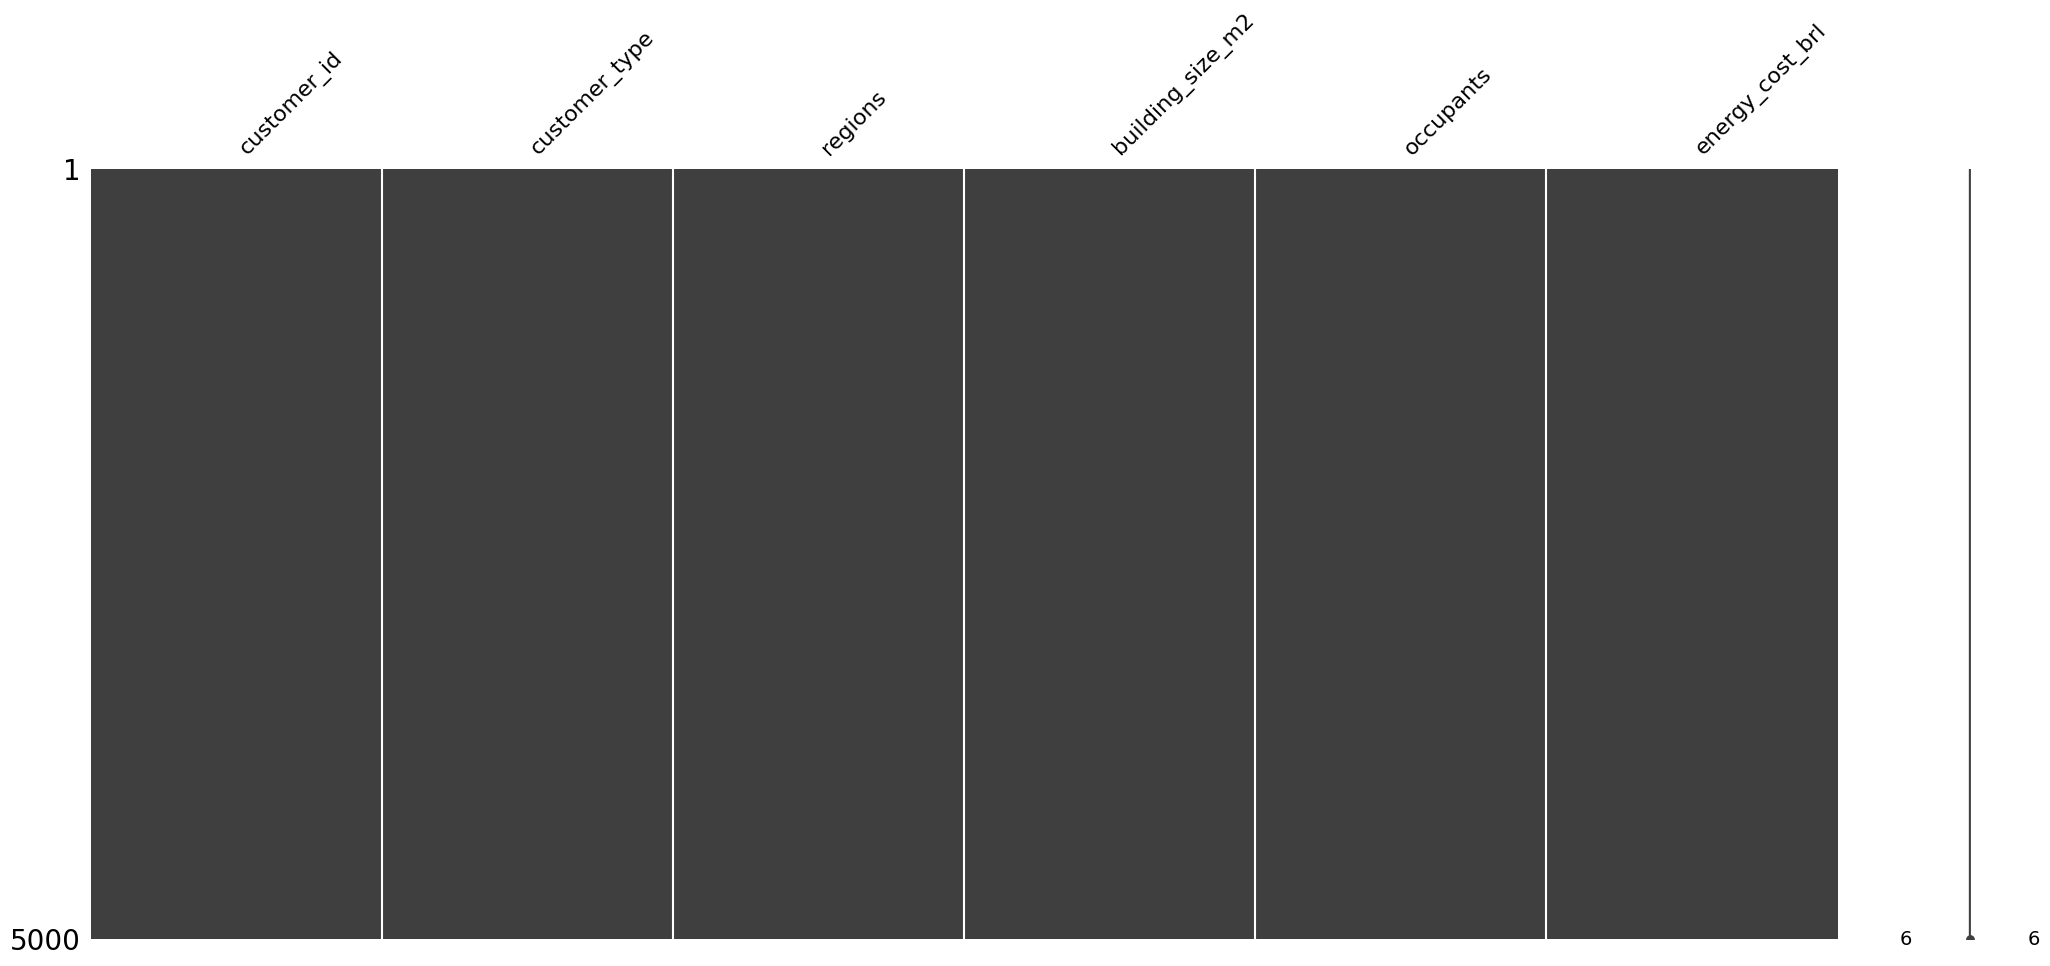

In [9]:
##Visualize the general missing values of data
msno.matrix(df)
plt.show()

In [10]:
missingvalues = df.isnull().sum()
print(missingvalues.loc[missingvalues!=0], '\n')

Series([], dtype: int64) 



In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       5000 non-null   object 
 1   customer_type     5000 non-null   object 
 2   regions           5000 non-null   object 
 3   building_size_m2  5000 non-null   int64  
 4   occupants         5000 non-null   int64  
 5   energy_cost_brl   5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB
None


In [12]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,building_size_m2,occupants,energy_cost_brl
count,5000.00,5000.00,5000.00
mean,39.58,2.30,86.87
std,17.52,1.03,24.38
min,17.00,1.00,52.52
25%,24.00,1.00,68.56
50%,45.00,2.00,83.72
75%,45.00,3.00,98.24
max,77.00,4.00,158.61


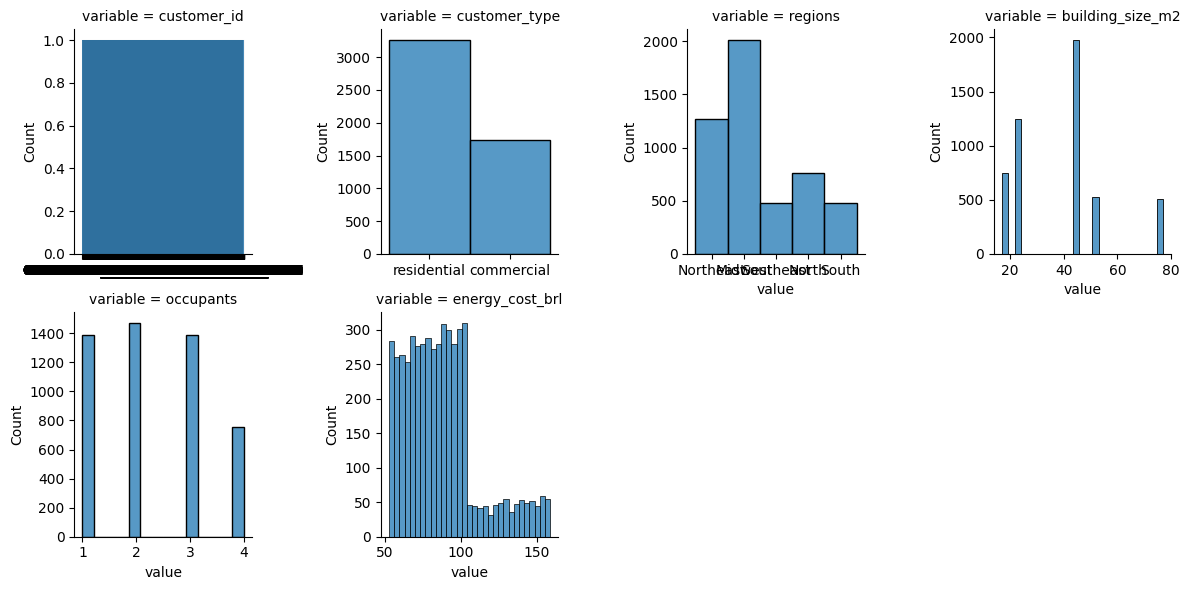

In [13]:
df = pd.DataFrame(data=df, columns=['customer_id','customer_type','regions','building_size_m2','occupants','energy_cost_brl'])

nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.histplot, 'value')
n1

<Axes: ylabel='energy_cost_brl'>

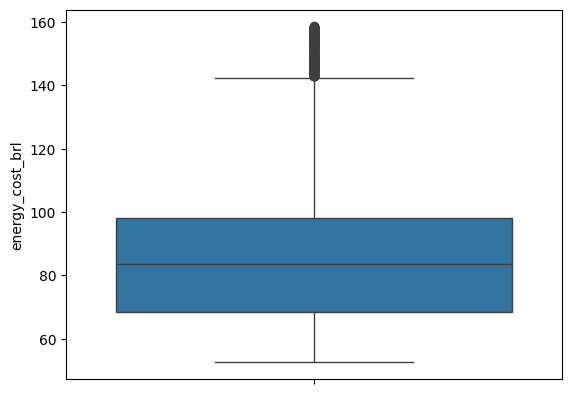

In [14]:
sns.boxplot(data = df['energy_cost_brl'])

In [17]:
df = df[['occupants','building_size_m2']]

fig = px.box(df.melt(), y="value", facet_col="variable",facet_col_wrap=2, boxmode="overlay", color="variable",height=1000, width=900)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

fig.show()